In [1]:

import os
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams["figure.facecolor"] = "white"


path = './data/raw/'
files = os.listdir(path)
print(*files)
fname = path + input()


ard_data.csv


In [8]:
df = pd.read_csv(fname, delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23515 entries, 0 to 23514
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       23514 non-null  float64
 1   0.1     23514 non-null  float64
dtypes: float64(2)
memory usage: 367.5 KB


<AxesSubplot:xlabel='0'>

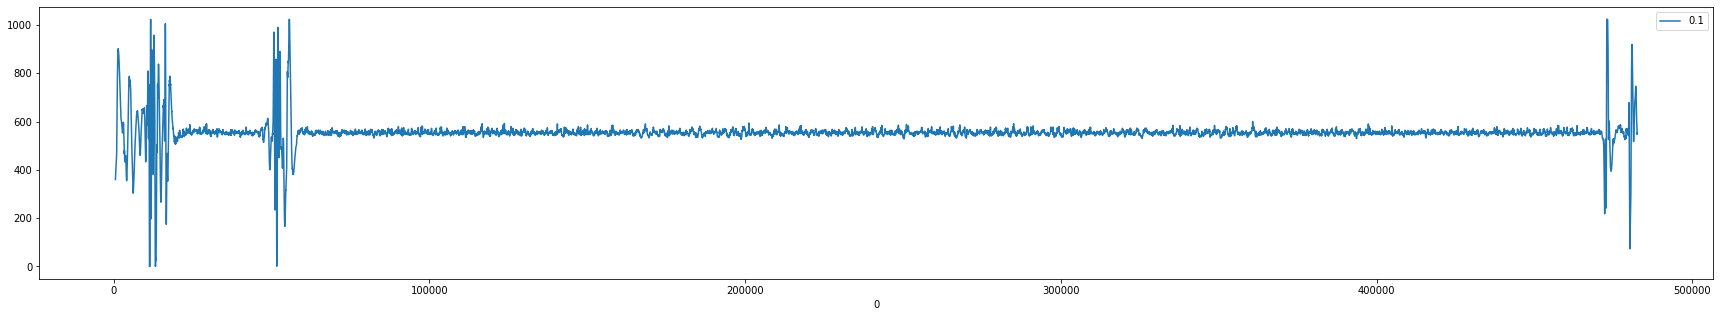

In [9]:
df.plot(x=0, y=1, figsize=(30, 5))
#plt.savefig(fname+'.png')